Load the CSV files


In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learnnstall pandas zipfile

  Using cached pandas-2.3.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement imbalanced-learnnstall (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for imbalanced-learnnstall


Extraction of zip file

In [ ]:
import zipfile

# Extract CSV from ZIP (if needed)
with zipfile.ZipFile('../data/raw/creditcard.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_data')



Load the data

In [12]:
import pandas as pd

fraud_data = pd.read_csv('../data/raw/Fraud_Data.csv')
print(fraud_data.head())
ip_to_country = pd.read_csv('../data/raw/IPAddress_to_Country.csv')
print(ip_to_country.head())
credit_data = pd.read_csv('../data/raw/creditcard.csv')
print(credit_data.head())


   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  
   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China


In [14]:
fraud_df = fraud_data.drop_duplicates()
ip_to_country_df = ip_to_country.drop_duplicates()
credit_df = credit_data.drop_duplicates()

drop missing values

In [ ]:
fraud_df = fraud_data.dropna()
ip_to_country_df = ip_to_country.dropna()
credit_df = credit_data.dropna()

Correct data types

In [ ]:
# Convert to datetime
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])



In [17]:
# Convert ip_address to integer
fraud_data['ip_address'] = fraud_data['ip_address'].astype('int64')
ip_to_country['lower_bound_ip_address'] = ip_to_country['lower_bound_ip_address'].astype('int64')
ip_to_country['upper_bound_ip_address'] = ip_to_country['upper_bound_ip_address'].astype('int64')


Univariate analysis

count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64


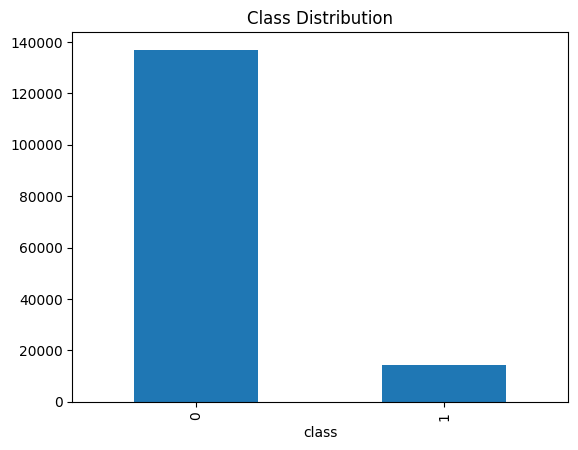

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


# Summary statistics for purchase_value
print(fraud_data['purchase_value'].describe())

# Histogram for purchase_value
fraud_data['purchase_value'].hist(bins=30)
plt.title('Distribution of Purchase Value')
plt.savefig('purchase_value_histogram.png')

# Bar plot for class
fraud_data['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.savefig('class_distribution.png')

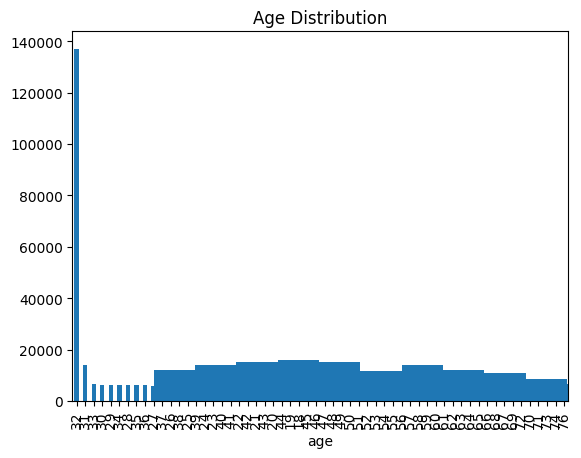

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


# Summary statistics for purchase_value

# Histogram for purchase_value
fraud_data['purchase_value'].hist(bins=30)
plt.title('Distribution of Purchase Value')
plt.savefig('purchase_value_histogram.png')

# Bar plot for class

fraud_data['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.savefig('class_distribution.png')

# Bar plot for class
fraud_data['age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.savefig('age_distribution.png')